Importaciones

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam  ## algoritmo de adams revisar sgdm rmsprop
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("kc_house_data.csv")

In [ ]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.info() ##informacion de la data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


PEARSON

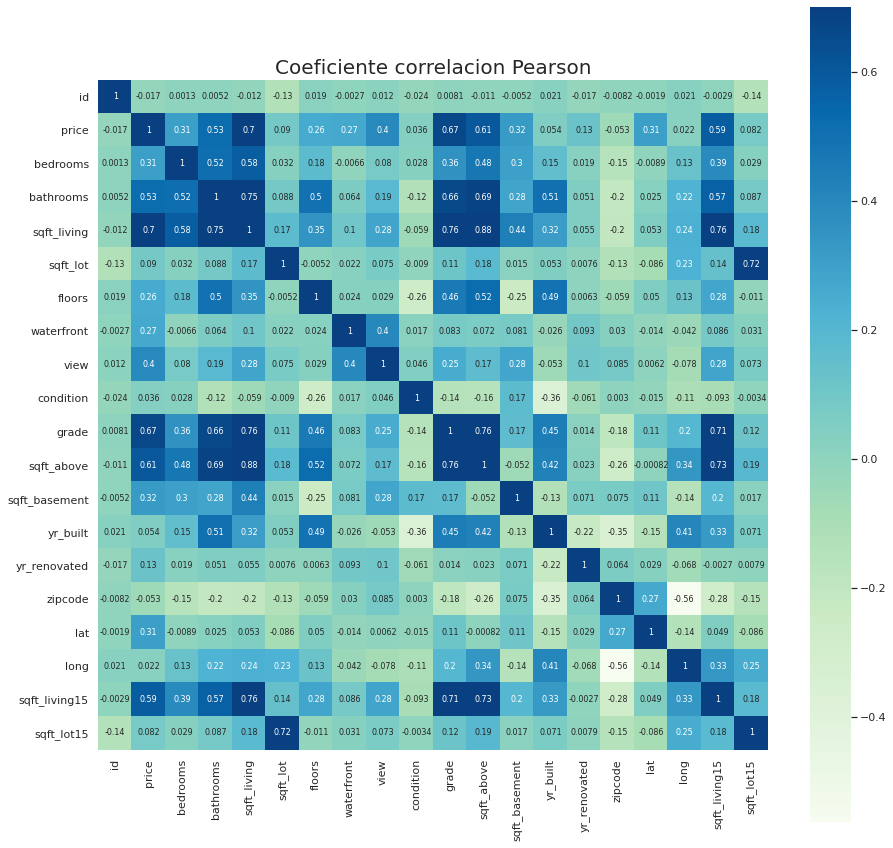

In [ ]:
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Coeficiente correlacion Pearson',fontsize = 20)
sns.heatmap(df.corr(),vmax=0.7,square=True,cmap="GnBu",linecolor='b',annot=True, annot_kws={"size":8})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


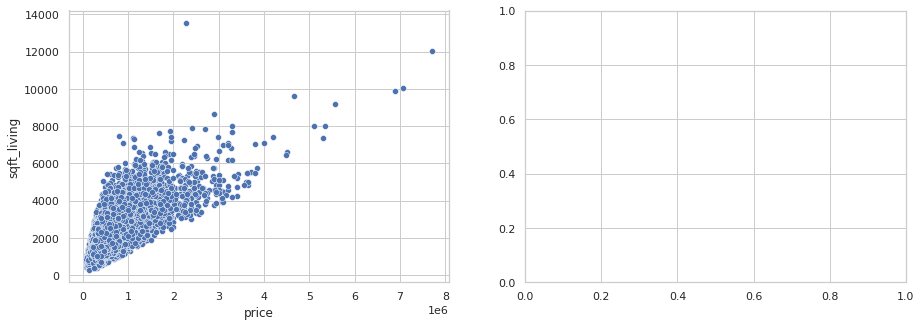

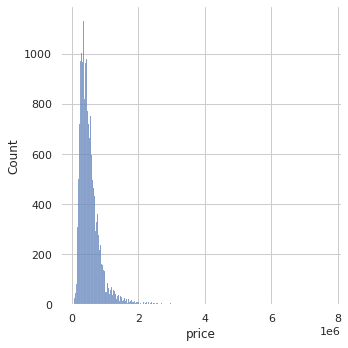

In [ ]:
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.displot(df['price'],ax=axes[1])  ##dispersion
sns.scatterplot(x='price',y='sqft_living',data=df,ax=axes[0])
sns.despine(bottom=True,left=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


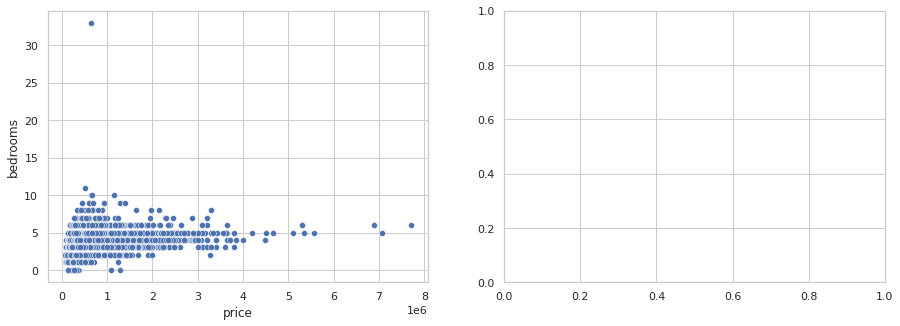

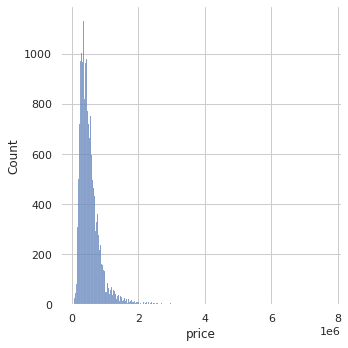

In [ ]:
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.displot(df['price'],ax=axes[1])  ##dispersion
sns.scatterplot(x='price',y='bedrooms',data=df,ax=axes[0])
sns.despine(bottom=True,left=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


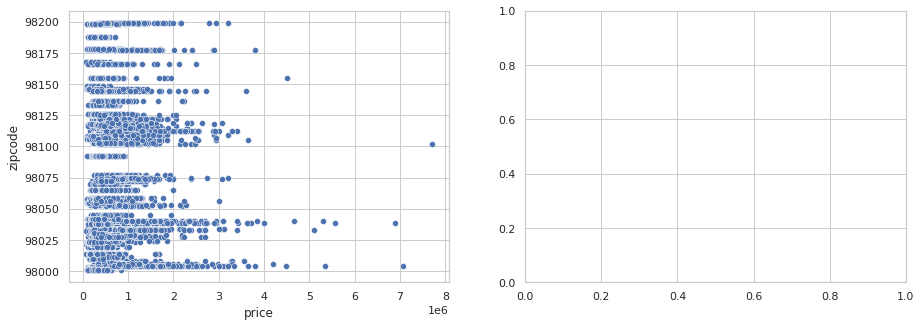

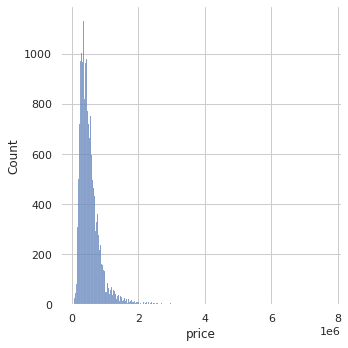

In [ ]:
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.displot(df['price'],ax=axes[1])  ##dispersion
sns.scatterplot(x='price',y='zipcode',data=df,ax=axes[0])
sns.despine(bottom=True,left=True)

In [ ]:
df = df.drop('id',axis=1)
df = df.drop('zipcode',axis=1)

In [ ]:
print(df['date'])

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object


In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]


In [ ]:
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.month)
df = df.drop('date',axis=1)

In [ ]:
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f11c1f470>,
      dtype=object)

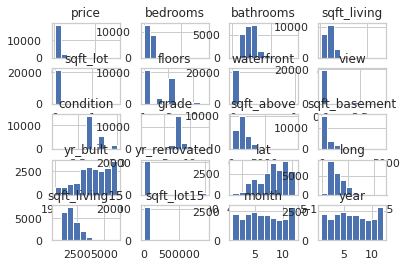

In [ ]:
df.hist()

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
print(X)

       bedrooms  bathrooms  sqft_living  ...  sqft_lot15  month  year
0             3       1.00         1180  ...        5650     10    10
1             3       2.25         2570  ...        7639     12    12
2             2       1.00          770  ...        8062      2     2
3             4       3.00         1960  ...        5000     12    12
4             3       2.00         1680  ...        7503      2     2
...         ...        ...          ...  ...         ...    ...   ...
21608         3       2.50         1530  ...        1509      5     5
21609         4       2.50         2310  ...        7200      2     2
21610         2       0.75         1020  ...        2007      6     6
21611         3       2.50         1600  ...        1287      1     1
21612         2       0.75         1020  ...        1357     10    10

[21613 rows x 19 columns]


In [ ]:
print(y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)  ### separacion de datos para entrenamiento validacion testeo

In [ ]:
scaler = MinMaxScaler() ## escalar o normalizar la data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

ANN (RED NEURONAL PARA REGRESION)

In [ ]:
model = Sequential()
## capa entrada mismas de carateristicas de X
model.add(Dense(19,activation='relu'))
## capas ocultas
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='relu'))
#capa de salida
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [ ]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),
          batch_size=150,
          epochs=200,
          verbose=1)

Epoch 1/200
101/101 [==============================] - 1s 3ms/step - loss: 423417898726.9020 - val_loss: 423826161664.0000
Epoch 2/200
101/101 [==============================] - 0s 2ms/step - loss: 426281982233.0980 - val_loss: 423711014912.0000
Epoch 3/200
101/101 [==============================] - 0s 2ms/step - loss: 457585164609.2549 - val_loss: 423129907200.0000
Epoch 4/200
101/101 [==============================] - 0s 2ms/step - loss: 424684730488.4706 - val_loss: 421390680064.0000
Epoch 5/200
101/101 [==============================] - 0s 2ms/step - loss: 430192051139.7647 - val_loss: 417623998464.0000
Epoch 6/200
101/101 [==============================] - 0s 2ms/step - loss: 421882195245.1765 - val_loss: 410808287232.0000
Epoch 7/200
101/101 [==============================] - 0s 2ms/step - loss: 420485291871.3726 - val_loss: 399955296256.0000
Epoch 8/200
101/101 [==============================] - 0s 2ms/step - loss: 397522912195.7647 - val_loss: 384269582336.0000
Epoch 9/200
101/

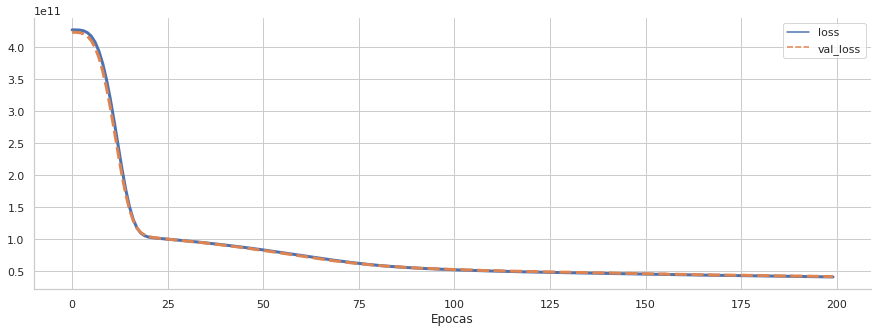

In [ ]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
plt.xlabel('Epocas')
plt.ylabel('')
sns.despine()

In [ ]:
prediccion = model.predict(X_test)
print('MAE', mean_absolute_error(y_test,prediccion))
print('VR', explained_variance_score(y_test,prediccion))


MAE 124468.30174990541
VR 0.6949793938720851


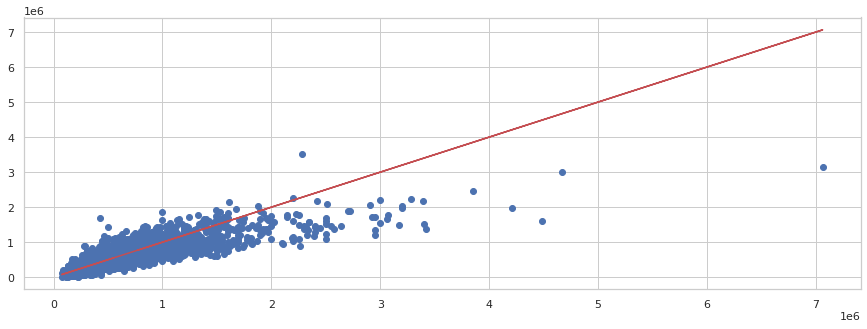

In [ ]:
f, axes = plt.subplots(1,figsize=(15,5))
plt.scatter(y_test,prediccion)
plt.plot(y_test,y_test,'r')

In [ ]:
casa = df.drop('price',axis=1).iloc[0]
##scaler.transform(casa.values.reshape(-1,19))
print('Precio Real ',df.iloc[0]['price'])
print('Precio Pred ',model.predict(scaler.transform(casa.values.reshape(-1,19)))[0,0])

Precio Real  221900.0
Precio Pred  218094.05
